**NAME : Mrudul Jambhulkar**

**INSTITUTE : IIT BOMBAY**

**3rd Year Undergrad in Electrical Engineering**

Colab link: https://colab.research.google.com/drive/1opCk8w_spVbjaU2L1UHpOUOq1aWtuq5P?usp=sharing

Singular spectral analysis (SSA) and recursive
estimate of coefficients of adaptive autoregressive (AR) modelling is used to  identify the damage in the reinforced
(RC) beam-column joints.


The specimen is excited under high
intensity white noise to get the response and identify the extent
of damage introduced due to shock. DSFs(Damage Sensitive Features) are used to quantify the damage using :Euclidean distance (ED) , Mahalanobis distance (MD) and Bhattacharyya distance (BD).



*The first step is SSA decomposition*

*It involves*:

*(1)Data acquisition as original time series*

*(2)Calculating time lag and embedding dimension*

*(3)Generate time lagged matrix and perform SVD(Singular Value Decomposition)*


(1) The time series consists of a trend , periodic and noise component

I am considering white gaussian noise and

$$trend=(t-50)^2$$

$$periodic = 2 sin(\frac{2πt}{30}) + 2 sin(\frac{2πt}{20}) $$


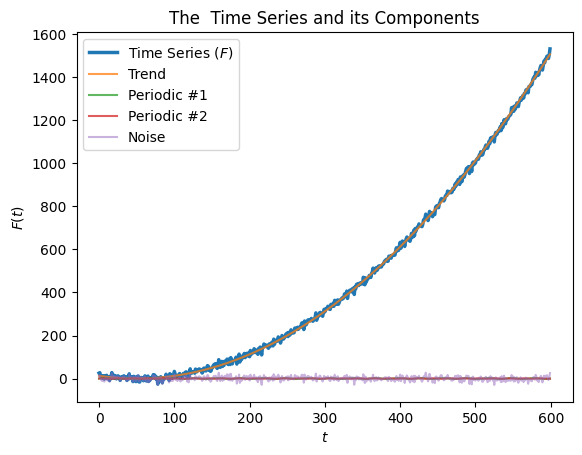

In [5]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
N = 600 # The number of time instances in  series
t = np.arange(0,N)
seed(1)
# create white noise series
noise = [10*gauss(0.0, 1.0) for i in range(N)]
trend = 0.005*(t - 50)**2
periodic1 = 2 * np.sin(2*pi*t/30)
periodic2=  np.sin(2*pi*t/20)
F = trend + periodic1+periodic2 + noise

# Plot everything
plt.plot(t, F, lw=2.5)
plt.plot(t, trend, alpha=0.75)
plt.plot(t, periodic1, alpha=0.75)
plt.plot(t, periodic2, alpha=0.75)
plt.plot(t, noise, alpha=0.5)
plt.legend(["Time Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$")
plt.title("The  Time Series and its Components");

*(2)We now need to form the trajectory matrix from the time series F. We need to select a window length L to form multi-dimensional lagged vectors. We need to find an optimal window length . L should be large enough but too high values of L may cause statistical errors to dominate. $2<L<N/2$*

*Trajectory matrix will be a L x K matrix where K=N-L+1*


*We need to find the optimal value of time lag using auto-correlation function.*

*The first zero crossings will correspond to the optimal delay*

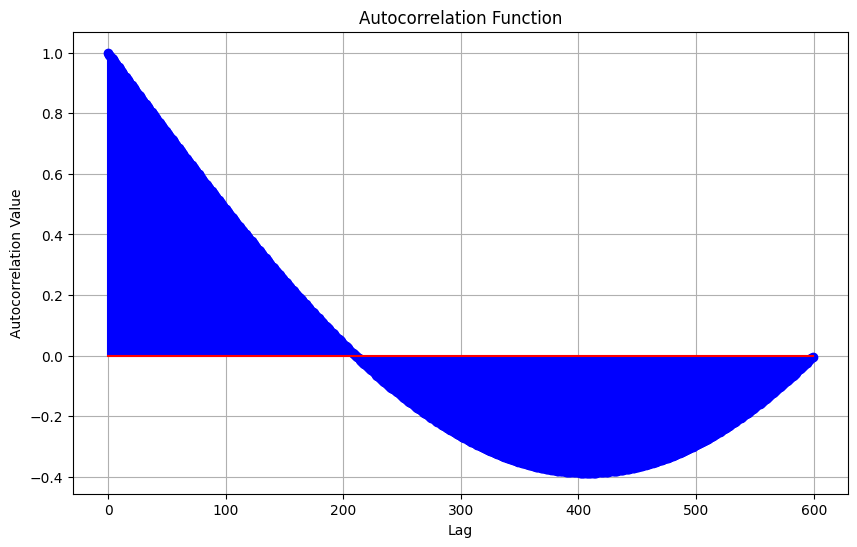

At Function value = 0, lag is approximately 210.42893845740346


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
def autocorrelation_function(time_series):
    """
    Calculate the autocorrelation function of a time series.

    Args:
        time_series (array-like): 1D array representing the time series.

    Returns:
        array-like: Autocorrelation values at different lags.
    """
    mean = np.mean(time_series)
    normalized_series = time_series - mean

    autocorrelation = np.correlate(normalized_series, normalized_series, mode='full')
    autocorrelation /= np.max(autocorrelation)  # Normalize to have values between -1 and 1

    return autocorrelation[len(autocorrelation)//2:]

# Example usage:
# Replace this with your own time series data


# Calculate autocorrelation
autocorr_values = autocorrelation_function(F)

# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plt.stem(autocorr_values, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Value')
plt.grid(True)
plt.show()
f = interp1d(autocorr_values,t)

# Given x value for interpolation
x_value_for_interpolation = 0
# Use the interpolation function to find the corresponding y value
tau = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At Function value = {x_value_for_interpolation}, lag is approximately {tau}")

**I tried to implement AMIF function which gives more accurate value of lag but unfortunately it took too long to compiles. This is the following code for AMIF FUNCTION**

In [7]:
# import scipy
# import numpy as np
# from sklearn.neighbors import KernelDensity

# # Example discrete time series
# time_series = F

# # Reshape the data to a column vector
# time_series = time_series.reshape(-1, 1)

# # Use kernel density estimation
# kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
# def prob(time_series):
#   kde.fit(time_series)
#   probability_series = np.exp(kde.score_samples(time_series))
#   return probability_series
# def calculate_joint_probability_array(F1, F2):
#     # Create pairs of all combinations of elements from F1 and F2
#     joint_pairs=[]
#     for x in F1:
#       for y in F2:
#         joint_pairs.append((x,y))


#     # Use kernel density estimation
#     kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
#     kde.fit(joint_pairs)

#     # Calculate the log probability density for each pair
#     log_density = kde.score_samples(joint_pairs)

#     # Convert log density to probability
#     joint_probability_array = np.exp(log_density)

#     return joint_probability_array
# def calculate_joint_prod(F1, F2):
#   result=[]
#   for x in F1:
#     for y in F2:
#       result.append(x*y)
#   return result
# AMIF=[]
# for t in range(0,N//10):
#   AMIF.append(scipy.stats.entropy( calculate_joint_probability_array(F,F[t:]) , calculate_joint_prod(prob(F),prob(F[t:]))  ) )

# plt.plot(AMIF)
# plt.xlabel('t')
# plt.ylabel('AMIF')
# plt.title('AMIF function plot')
# plt.show()

The first minima will correspond to the optimal lag

*Optimal time lag=210*



*We use False Nearest Neighbours Method to estimate the optimal embedding dimension.*

*This method involves : (ⅰ) Sequentially embed the time series into a higher-dimensional delay coordinate system. (ⅱ) Compare the neighborhood distance of the lower-dimensional delay coordinate vector with that of the next higher-dimensional delay coordinate vector. (ⅲ) If the rate of change of the neighborhood distance of the delay coordinate vector with increasing dimensionality of the delay coordinate system exceeds a given threshold value, the vector is considered a false neighborhood. (iv) The minimum embedding dimension is that in which all delay coordinate vectors are not false neighbors for the first time with increasing embedding dimensions.*

The optimal time lag value was too high maybe because i faced difficulty implementing AMIF function for this and used autocorrelation.

For False Nearest Neighbours Method , the chosen threshold is 50

3 0.22192297728005927
4 0.1520739922404521
5 0.11548820718321803
6 0.09293947905169368
7 0.0776536844273088
8 0.06659765891001009
9 0.05823832920255665
10 0.05168222285539724
11 0.04641688401745015
12 0.042097015855311275
13 0.03847580176383046
14 0.03539384203251842
15 0.03274743674611243
16 0.0304517338869455
17 0.028444285159643333
18 0.02666428883002128
19 0.02508212508883377
20 0.023658826977749393
21 0.022373921007926668
22 0.021216620684566555
23 0.02016044010579533
24 0.019195166594306482
25 0.018310953330337144
26 0.017500395229426924
27 0.016749889409318323
28 0.016055536715933377
29 0.015409178304461464
30 0.014806557827514562
31 0.014248515940386735
32 0.013721819780480895
33 0.013227780170193625
34 0.012762556039453267
35 0.01232688802186387
36 0.011914781666433363
37 0.0115281276624686
38 0.011159484160373448
39 0.010810812960666138
40 0.010481106649726638
41 0.010165449812919473
42 0.009866263215801054
43 0.009581907663989642
44 0.009312738750049485
45 0.0090537505644611

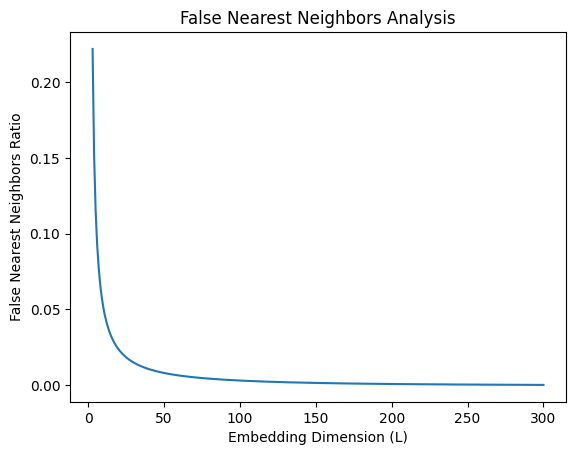

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def frobenius_norm(matrix):
    return np.sqrt(np.sum(np.square(np.abs(matrix))))

def matrix_distance(matrix1, matrix2):
    return abs(frobenius_norm(matrix1) - frobenius_norm(matrix2))

def traj(series, L):
    K = len(series) - (L - 1)
    X = np.column_stack([series[i:i+L] for i in range(0, K)])
    return X

def optimal_L(series):
    rate = 0
    L = 2
    l1 = []
    r1 = []
    while L < 300:
        lower, higher = traj(series, L), traj(series, L + 1)
        rate = matrix_distance(lower, higher) / frobenius_norm(lower)
        L += 1
        l1.append(L)
        r1.append(rate)
        print(L, rate)

    plt.plot(l1, r1)
    plt.xlabel('Embedding Dimension (L)')
    plt.ylabel('False Nearest Neighbors Ratio')
    plt.title('False Nearest Neighbors Analysis')
    plt.show()


result = optimal_L(F)




*Clearly the absolute value of rate starts decreasing and from the graph choosing optimal value for L to be approximately 50*


In [9]:
L = 50 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([F[i:i+L] for i in range(0,K)])
# Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive.
print(X)
print(len(X))
print(len(X[0]))


[[  25.38184753   27.22429646   13.58461663 ... 1258.71790332
  1240.49318024 1261.44545502]
 [  27.22429646   13.58461663    5.38415099 ... 1240.49318024
  1261.44545502 1242.13155705]
 [  13.58461663    5.38415099    2.09561402 ... 1261.44545502
  1242.13155705 1266.04989534]
 ...
 [  -4.03142399    6.61178132  -14.22492091 ... 1497.99394904
  1494.1292715  1487.41589969]
 [   6.61178132  -14.22492091   -6.11188083 ... 1494.1292715
  1487.41589969 1504.57688954]
 [ -14.22492091   -6.11188083   10.36208342 ... 1487.41589969
  1504.57688954 1531.65337707]]
50
551


*Next, we carry out SVD(Singular Value Decomposition) of the trajectory matrix*

$X = U Σ V^†$


U
  is an L×L
 unitary matrix containing the orthonormal set of left singular vectors of X
 as columns;


Σ
 is an L×K
 rectangular diagonal matrix containing L
 singular values of X
, ordered from largest to smallest; and


V
 is a K×K
 unitary matrix containing the orthonormal set of right singular vectors of X
 as columns.

$X=ΣX_j$ where $X_j=\sqrt{λ_j} U_j V_j^{'}$

In [10]:
d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.
U, Sigma, V = np.linalg.svd(X)
V = V.T # Note: the SVD routine returns V^T, not V, so I'll tranpose it back here. This may seem pointless,
# but I'll treat the Python representation of V consistently with the mathematical notation in this notebook.

# Calculate the elementary matrices of X, storing them in a multidimensional NumPy array.
# This requires calculating sigma_i * U_i * (V_i)^T for each i, or sigma_i * outer_product(U_i, V_i).
# Note that Sigma is a 1D array of singular values, instead of the full L x K diagonal matrix.
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

print(X_elem)



[[[ 4.97040988e+00  4.43089246e+00  4.19074521e+00 ...  1.20819270e+03
    1.21259030e+03  1.21778519e+03]
  [ 4.99501705e+00  4.45282863e+00  4.21149247e+00 ...  1.21417414e+03
    1.21859352e+03  1.22381412e+03]
  [ 5.02042655e+00  4.47548004e+00  4.23291621e+00 ...  1.22035061e+03
    1.22479246e+03  1.23003962e+03]
  ...
  [ 6.22060429e+00  5.54538345e+00  5.24483257e+00 ...  1.51208631e+03
    1.51759002e+03  1.52409156e+03]
  [ 6.24904209e+00  5.57073444e+00  5.26880959e+00 ...  1.51899889e+03
    1.52452776e+03  1.53105902e+03]
  [ 6.27838090e+00  5.59688864e+00  5.29354627e+00 ...  1.52613048e+03
    1.53168531e+03  1.53824723e+03]]

 [[ 6.99271949e+00  6.50444740e+00  4.88425772e+00 ...  2.75646219e+01
    2.64949779e+01  2.55038983e+01]
  [ 6.73843824e+00  6.26792153e+00  4.70664796e+00 ...  2.65622699e+01
    2.55315221e+01  2.45764818e+01]
  [ 6.48815011e+00  6.03510997e+00  4.53182732e+00 ...  2.55756584e+01
    2.45831960e+01  2.36636291e+01]
  ...
  [-6.47910335e+00 -6.0

Finally , the time series is now decomposed and X is  represented  as a sum of rank-one
bi-orthogonal elementary matrices.

**Reconstruction**

We need to use average diagonalising and hankelise the matrices and convert the matrix into a time series such that Kth term of the time series will be $avg(z_{ij})$ for all i,j such that $i+j=k+2$ thus the initial series can be decomposed into sum of series

In [11]:
# import scipy
# from scipy.linalg import hankel

# hx_elems=[]
# for i in range(len(X_elem)):
#   hx_elems.append(scipy.linalg.hankel(X_elem[i]))


In [12]:
def Hankelise(X):
    """
    Hankelises the matrix X, returning H(X).
    """
    L, K = X.shape
    transpose = False
    if L > K:
        # The Hankelisation below only works for matrices where L < K.
        # To Hankelise a L > K matrix, first swap L and K and tranpose X.
        # Set flag for HX to be transposed before returning.
        X = X.T
        L, K = K, L
        transpose = True

    HX = np.zeros((L,K))

    # I know this isn't very efficient...
    for m in range(L):
        for n in range(K):
            s = m+n
            if 0 <= s <= L-1:
                for l in range(0,s+1):
                    HX[m,n] += 1/(s+1)*X[l, s-l]
            elif L <= s <= K-1:
                for l in range(0,L-1):
                    HX[m,n] += 1/(L-1)*X[l, s-l]
            elif K <= s <= K+L-2:
                for l in range(s-K+1,L):
                    HX[m,n] += 1/(K+L-s-1)*X[l, s-l]
    if transpose:
        return HX.T
    else:
        return HX

In [13]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

Now we will construct the first 12 elementary components for the time series

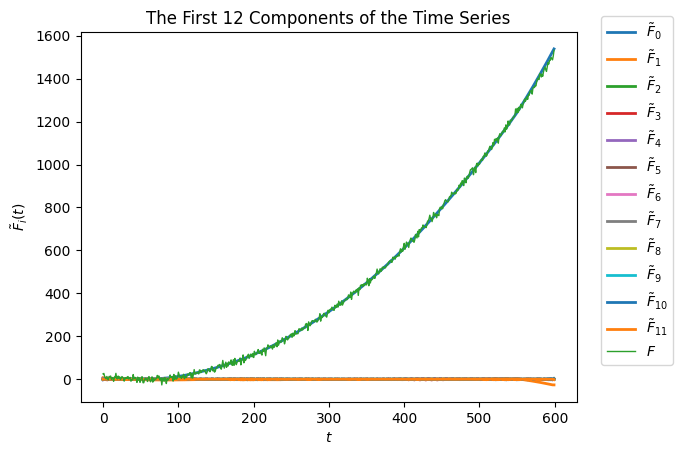

In [14]:
n = min(12,d) # In case of noiseless time series with d < 12.

# Fiddle with colour cycle - need more colours!
fig = plt.subplot()


# Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
for i in range(n):
    F_i = X_to_TS(X_elem[i])
    fig.axes.plot(t, F_i, lw=2)

fig.axes.plot(t, F, alpha=1, lw=1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("The First 12 Components of the Time Series")
fig.legend(legend, loc=(1.05,0.1));

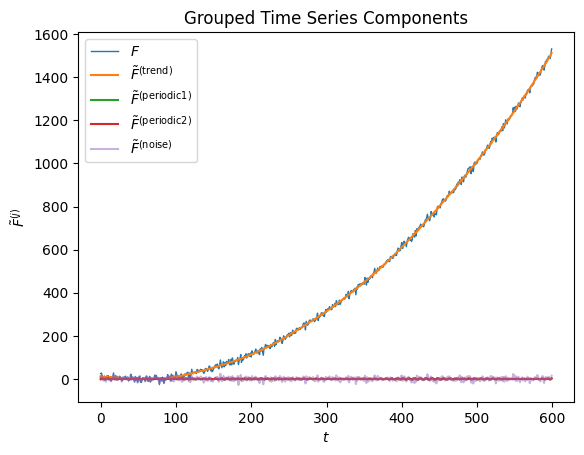

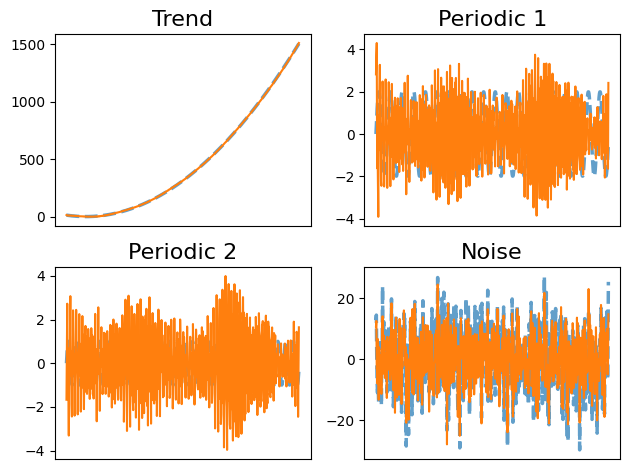

In [15]:
F_trend = X_to_TS(X_elem[[0,1,6]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[2,3]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[4,5]].sum(axis=0))
F_noise = X_to_TS(X_elem[7:].sum(axis=0))

# Plot the toy time series and its separated components on a single plot.
plt.plot(t,F, lw=1)
plt.plot(t, F_trend)
plt.plot(t, F_periodic1)
plt.plot(t, F_periodic2)
plt.plot(t, F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "periodic 2", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.show()

# A list of tuples so we can create the next plot with a loop.
components = [("Trend", trend, F_trend),
              ("Periodic 1", periodic1, F_periodic1),
              ("Periodic 2", periodic2, F_periodic2),
              ("Noise", noise, F_noise)]

fig = plt.figure()
n=1
for name, orig_comp, ssa_comp in components:
    ax = fig.add_subplot(2,2,n)
    ax.plot(t, orig_comp, linestyle="--", lw=2.5, alpha=0.7)
    ax.plot(t, ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()

We need to select the essential time series . I chose the first 30 elements to reconstruct the time series

Text(0.5, 1.0, 'The essential components of the time series')

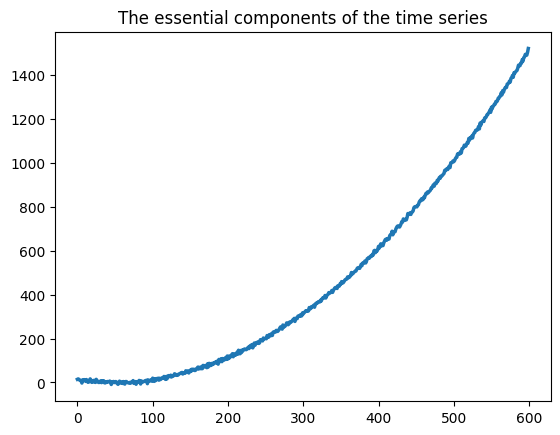

In [23]:
F = X_to_TS(X_elem[0:12].sum(axis=0))
plt.plot(t, F, lw=2.5)
plt.title("The essential components of the time series")

Text(0.5, 1.0, 'The last Time Series Components')

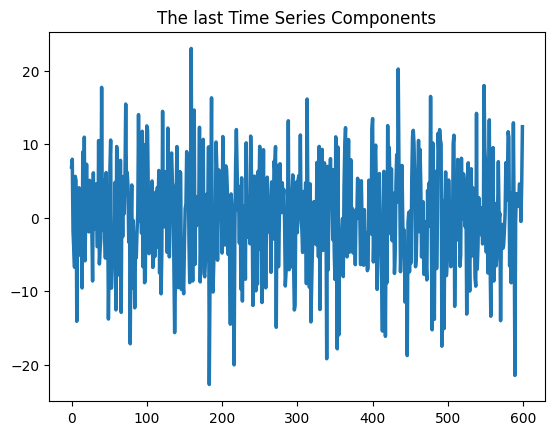

In [24]:
F = X_to_TS(X_elem[13:].sum(axis=0))
plt.plot(t, F, lw=2.5)
plt.title("The last Time Series Components")

Clearly the later components are corrupted by noise.